<a href="https://colab.research.google.com/github/Quang-Trong-Tan-Loc/AI/blob/main/BT5_renal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=7be01ee0559c174253c6498b2c3d85c7833f974301edc0d1ff64f25bb6487e80
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

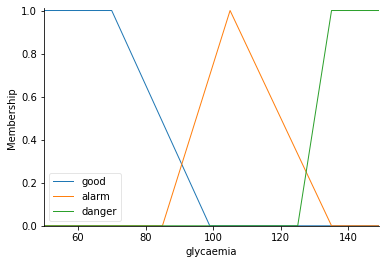

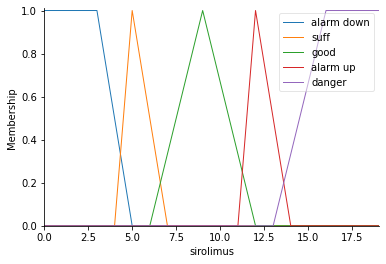

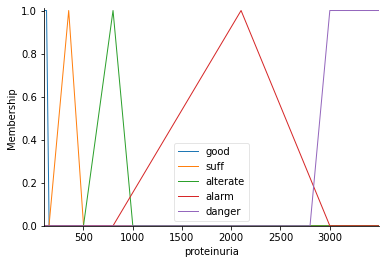

In [28]:
#Case study 1
# FrotFiS
glycaemia = ctrl.Antecedent(np.arange(50,150,1),'glycaemia')
sirolimus = ctrl.Antecedent(np.arange(0,20,1),'sirolimus')
proteinuria = ctrl.Consequent(np.arange(100,3500,1),'proteinuria')

glycaemia['good'] = fuzz.trapmf(glycaemia.universe,[50,50,70,99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe,[85,105,135])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe,[125,135,150,150])
glycaemia.view()

sirolimus['alarm down'] = fuzz.trapmf(sirolimus.universe,[0, 0, 3, 5])
sirolimus['suff'] = fuzz.trimf(sirolimus.universe,[4, 5, 7])
sirolimus['good'] = fuzz.trimf(sirolimus.universe,[6, 9, 12])
sirolimus['alarm up'] = fuzz.trimf(sirolimus.universe,[11, 12 ,14])
sirolimus['danger'] = fuzz.trapmf(sirolimus.universe,[13, 16, 20, 20])
sirolimus.view()

proteinuria['good'] = fuzz.trapmf(proteinuria.universe,[100, 100, 125, 150])
proteinuria['suff'] = fuzz.trimf(proteinuria.universe,[150, 350, 500])
proteinuria['alterate'] = fuzz.trimf(proteinuria.universe,[500, 800, 1000])
proteinuria['alarm'] = fuzz.trimf(proteinuria.universe,[800, 2100, 3000])
proteinuria['danger'] = fuzz.trapmf(proteinuria.universe,[2800, 3000, 3500, 3500])
proteinuria.view()

In [29]:
rule1 = ctrl.Rule(glycaemia['good'] & sirolimus['good'] , proteinuria['good'])
rule2 = ctrl.Rule(glycaemia['danger'] & sirolimus['danger'] , proteinuria['danger'])
rule3 = ctrl.Rule(glycaemia['good'] & sirolimus['suff'] , proteinuria['suff'])
rule4 = ctrl.Rule(glycaemia['alarm'] & sirolimus['alarm up'] , proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm'] & sirolimus['suff'] , proteinuria['alterate'])
rule6 = ctrl.Rule(glycaemia['good'] & sirolimus['alarm up'] , proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['alarm'] & sirolimus['good'] , proteinuria['suff'])
rule8 = ctrl.Rule(glycaemia['good'] & sirolimus['alarm down'] , proteinuria['suff'])
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])

295.7096619590354


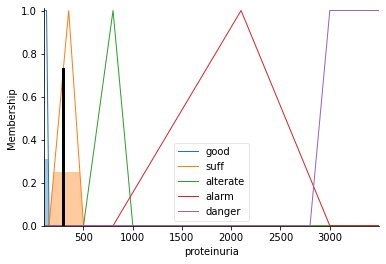

In [34]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['glycaemia'] = 90
tipping.input['sirolimus'] = 7.82
tipping.compute()
print(tipping.output['proteinuria'])
proteinuria.view(sim = tipping)

In [36]:
#GfrFIS
glycaemia = ctrl.Antecedent(np.arange(50,150,1),'glycaemia')
cyclosporine = ctrl.Antecedent(np.arange(0,20,1),'cyclosporine')
gfr = ctrl.Consequent(np.arange(0,130,1),'gfr')


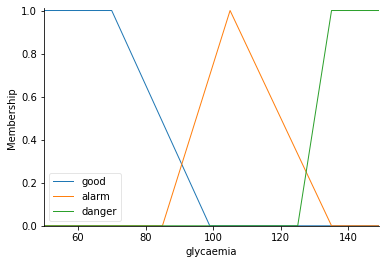

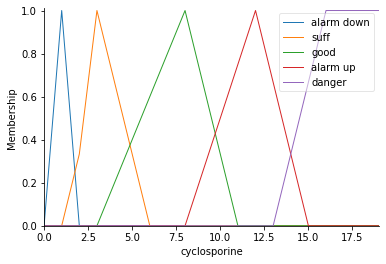

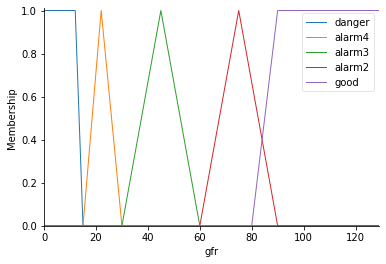

In [40]:
glycaemia['good'] = fuzz.trapmf(glycaemia.universe,[50,50,70,99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe,[85,105,135])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe,[125,135,150,150])
glycaemia.view()

cyclosporine['alarm down'] = fuzz.trimf(cyclosporine.universe,[0, 1, 2])
cyclosporine['suff'] = fuzz.trimf(cyclosporine.universe,[1.5, 3, 6])
cyclosporine['good'] = fuzz.trimf(cyclosporine.universe,[3, 8, 11])
cyclosporine['alarm up'] = fuzz.trimf(cyclosporine.universe,[8, 12 ,15])
cyclosporine['danger'] = fuzz.trapmf(cyclosporine.universe,[13, 16, 20, 20])
cyclosporine.view()

gfr['danger'] = fuzz.trapmf(gfr.universe,[0, 0, 12, 15])
gfr['alarm4'] = fuzz.trimf(gfr.universe,[15, 22, 30])
gfr['alarm3'] = fuzz.trimf(gfr.universe,[30, 45, 60])
gfr['alarm2'] = fuzz.trimf(gfr.universe,[60, 75, 90])
gfr['good']   = fuzz.trapmf(gfr.universe,[80, 90, 130, 130])
gfr.view()

rule1 = ctrl.Rule(glycaemia['danger'] & cyclosporine['danger'] , gfr['danger'])
rule2 = ctrl.Rule(glycaemia['good'] & cyclosporine['danger'] , gfr['alarm3'])
rule3 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['alarm up'] , gfr['alarm4'])
rule4 = ctrl.Rule(glycaemia['good'] & cyclosporine['suff'] , gfr['alarm2'])
rule5 = ctrl.Rule(glycaemia['good'] & cyclosporine['good'] , gfr['good'])
rule6 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['good'] , gfr['alarm2'])
rule7 = ctrl.Rule(glycaemia['danger'] & cyclosporine['good'] , gfr['alarm3'])
gfr_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])


44.99999999999998


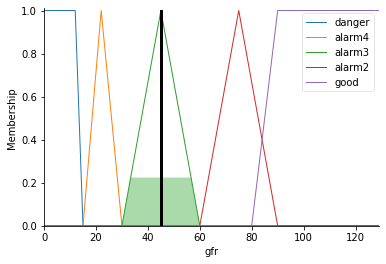

In [41]:
gfring = ctrl.ControlSystemSimulation(gfr_ctrl)
gfring.input['glycaemia'] = 142
gfring.input['cyclosporine'] = 4.12
gfring.compute()
print(gfring.output['gfr'])
gfr.view(sim = gfring)

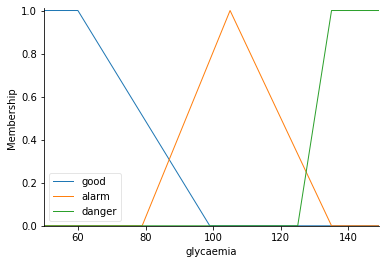

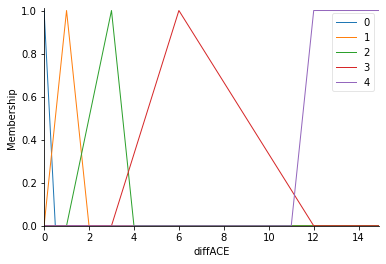

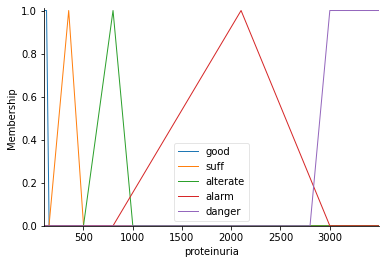

In [87]:
#Case study 2
#ProtACE
lycaemia = ctrl.Antecedent(np.arange(50,150,1),'glycaemia')
diffACE = ctrl.Antecedent(np.arange(0,15,0.1),'diffACE')
proteinuria = ctrl.Consequent(np.arange(100,3500,1),'proteinuria')

glycaemia['good'] = fuzz.trapmf(glycaemia.universe,[50,50,60,99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe,[79,105,135])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe,[125,135,150,150])
glycaemia.view()

diffACE['0'] = fuzz.trimf(diffACE.universe,[0, 0, 0.5])
diffACE['1'] = fuzz.trimf(diffACE.universe,[0, 1, 2])
diffACE['2'] = fuzz.trimf(diffACE.universe,[1, 3, 4])
diffACE['3'] = fuzz.trimf(diffACE.universe,[3, 6, 12])
diffACE['4'] = fuzz.trapmf(diffACE.universe,[11, 12, 15, 15 ])
diffACE.view()

proteinuria['good'] = fuzz.trapmf(proteinuria.universe,[100,100, 125, 150])
proteinuria['suff'] = fuzz.trimf(proteinuria.universe,[150, 350, 500])
proteinuria['alterate'] = fuzz.trimf(proteinuria.universe,[500, 800, 1000])
proteinuria['alarm'] = fuzz.trimf(proteinuria.universe,[800, 2100, 3000])
proteinuria['danger'] = fuzz.trapmf(proteinuria.universe,[2800, 3000, 3500, 3500])
proteinuria.view()


In [88]:
rule1 = ctrl.Rule(glycaemia['alarm'] & diffACE['2'] , proteinuria['suff'])
rule2 = ctrl.Rule(glycaemia['good'] & diffACE['1'] , proteinuria['suff'])
rule3 = ctrl.Rule(glycaemia['alarm'] & diffACE['1'] , proteinuria['alterate'])
rule4 = ctrl.Rule(glycaemia['danger'] & diffACE['1'] , proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm'] & diffACE['3'] , proteinuria['alarm'])
rule6 = ctrl.Rule(glycaemia['good'] & diffACE['3'] , proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['danger'] & diffACE['4'] , proteinuria['danger'])
rule8 = ctrl.Rule(glycaemia['good'] & diffACE['0'] , proteinuria['good'])
gfr_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])


325.477626948216


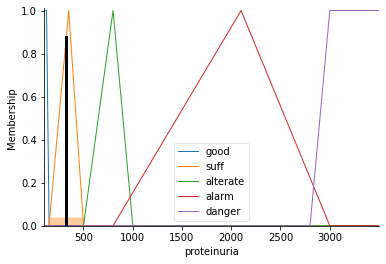

In [89]:
gfring = ctrl.ControlSystemSimulation(gfr_ctrl)
gfring.input['glycaemia'] = 80
gfring.input['diffACE'] = 2.5
gfring.compute()
print(gfring.output['proteinuria'])
proteinuria.view(sim = gfring)